In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
SEED = 42

In [3]:
generator = np.random.default_rng(seed=SEED) # gerador aleatorio do numpy

# código para simulação de um modulador 2fsk

In [4]:
# parâmetros da simulação
freq_c = 200 # Hz -> Frequencia da portadora
fq = 10 # Hz -> Frequencia de chaveamento
n_bits = 20 # numero de bits a serem transmitidos
rb = 100 # taxa de bits
fs = rb*freq_c # frequencia de amostragem

In [5]:
bits = generator.integers(0, 2, n_bits) # gera bits aleatórios

t = np.arange(0, n_bits/freq_c+1/fs, 1/fs) # tempo de simulação

mod = np.zeros(len(t)) # armazenar o sinal modulado no dominio do tepmo
sqr_signal = np.zeros(len(t)) # armazenar o sinal de bits no dominio do tempo

# loop sobre os bits transmitidos
for i in range(n_bits):

    start_index = i * rb # amostra o sinal na taxa de rb "bits"
    end_index = (i + 1) * rb

    if bits[i]: # se bit 1 modular o sinal com frequencia f1
        mod[start_index:end_index] = np.cos(2*np.pi*(freq_c-fq)*t[start_index:end_index])
        sqr_signal[start_index:end_index] = np.ones(rb)

    else: # se bit 0, modular o sinal com frequencia f2
        mod[start_index:end_index] = np.cos(2*np.pi*(freq_c+fq)*t[start_index:end_index])
        sqr_signal[start_index:end_index] = -np.ones(rb)

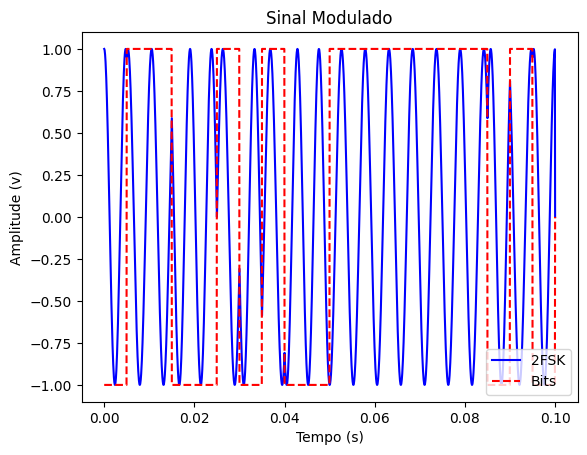

In [6]:
# printa todos os sinais
plt.plot(t, mod, 'b')
plt.plot(t, sqr_signal, 'r--')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude (v)')
plt.title('Sinal Modulado')
plt.legend(['2FSK', 'Bits'], loc='lower right')
plt.show()